In [2]:

from math import log10, exp
import numpy as np
import matplotlib.pyplot as plt

#下表中，p为每艘火箭载货量，N为一年总发射火箭次数，M为总货物量
p = 125
N = 1472
M = 10**8

#=============================================================================
#                           1. 用地占用指标 (Land Use)
#=============================================================================
A_E = 50 * 3      # 电梯用地 (km²) - 3座电梯
A_R = 75 * 7      # 火箭用地 (km²) - 7个发射场

#=============================================================================
#                           2. 噪音污染指标 (Noise Pollution)
#=============================================================================

# -------------------- 电梯 LDN 估算 --------------------
# 太空电梯噪音源: 电磁驱动系统、缆绳振动、攀爬器运动、配套设施
# 
# 文献类比依据:
# 1. EPA (1974) "Model Noise Ordinances": 大型工业设施厂界 60-70 dB
# 2. NUREG-1437 (NRC): 核电站/火电站厂界 55-65 dB  
# 3. Pedersen & Waye (2004), JASA: 风力发电机组(300m) 45-55 dB
# 4. EU Directive 2002/49/EC: 工业区域噪音限值 Lnight ≤ 55 dB
#
# 太空电梯特点: 持续运行(24/7)、超大功率驱动(数百吨载荷)、高速运行(200+km/h)
# 类比大型电站厂界噪音的中上限
LDN_E = 62  # dB (参考大型工业设施厂界噪音)

print("=" * 60)
print("电梯 LDN 估算依据")
print("=" * 60)
print("噪音来源: 电磁驱动系统、缆绳振动、攀爬器运动、配套设施")
print("文献参考: ")
print("  - EPA (1974): 大型工业设施厂界 60-70 dB")
print("  - NUREG-1437: 电站厂界 55-65 dB")
print("  - 考虑持续运行(24/7)和超大功率特性")
print(f"采用值: LDN_E = {LDN_E} dB")

# -------------------- 火箭 LDN 计算 (FAA DNL 方法) --------------------
# Reference: FAA Order 1050.1F, Appendix B (Environmental Impacts)
# DNL = SEL + 10*log10(N_eff) - 49.4

SEL_single = 120  # dB，单次重型火箭发射声暴露级 (典型值)
n_daily = N / 365  # 每天发射次数

# 夜间发射惩罚 (10pm-7am 发射权重×10，即+10dB)
day_fraction = 0.7    # 假设70%白天发射
night_fraction = 0.3  # 30%夜间发射
n_effective = n_daily * (day_fraction + 10 * night_fraction)

# FAA 标准公式
LDN_R = SEL_single + 10 * log10(n_effective) - 49.4

print("\n" + "=" * 60)
print("火箭 LDN 计算 (FAA DNL Method)")
print("Reference: FAA Order 1050.1F, Appendix B")
print("=" * 60)
print(f"单次发射 SEL = {SEL_single} dB")
print(f"年发射次数 N = {N} 次")
print(f"日均发射 = {n_daily:.2f} 次/天")
print(f"有效发射数 (含夜间+10dB惩罚) = {n_effective:.2f}")
print(f"LDN_R = {SEL_single} + 10×log₁₀({n_effective:.2f}) - 49.4 = {LDN_R:.1f} dB")

print("\n" + "=" * 60)
print("噪音对比")
print("=" * 60)
print(f"电梯 LDN = {LDN_E} dB (持续运行)")
print(f"火箭 LDN = {LDN_R:.1f} dB (间歇发射)")
print(f"差值 = {LDN_R - LDN_E:.1f} dB (火箭能量约为电梯的 {10**((LDN_R-LDN_E)/10):.1f} 倍)")

#=============================================================================
#           噪音污染量化: FICON曲线 (美国联邦标准)
#=============================================================================
# Reference: FICON (1992), Federal Interagency Committee on Noise
# "Federal Agency Review of Selected Airport Noise Analysis Issues"
# 
# FICON曲线适用于航空/航天噪音评估，比Schultz曲线更适合本问题
# %HA = 100 / (1 + exp(11.13 - 0.141 × LDN))

def ficon_curve(LDN):
    """
    FICON曲线: 高烦恼人口百分比 (%Highly Annoyed)
    Reference: FICON (1992), Federal Interagency Committee on Noise
    """
    return 100 / (1 + exp(11.13 - 0.141 * LDN))

HA_E = ficon_curve(LDN_E)
HA_R = ficon_curve(LDN_R)

print("\n" + "=" * 60)
print("噪音污染量化: FICON曲线")
print("Reference: FICON (1992), Federal Agency Review")
print("Formula: %HA = 100 / (1 + exp(11.13 - 0.141 × LDN))")
print("=" * 60)
print(f"电梯 LDN = {LDN_E} dB → %HA = {HA_E:.2f}%")
print(f"火箭 LDN = {LDN_R:.1f} dB → %HA = {HA_R:.2f}%")

print(f"火箭/电梯 烦恼度比: {HA_R/HA_E:.2f}x")

# 噪音评分 (使用FICON %HA)
Score_E = HA_E
Score_R = HA_R

#=============================================================================
#                           3. 排放污染指标 (Emissions)
#=============================================================================
Pol_E = 32        # 电梯排放指标 (常规电网)
Pol_E_new = 7.5   # 电梯排放指标 (清洁能源电网)
Pol_R = 225       # 火箭排放指标 (燃料燃烧)

#=============================================================================
#                           4. 归一化处理
#=============================================================================
print("\n" + "=" * 60)
print("归一化指标对比")
print("-" * 60)

# 用地归一化
cz_E1 = A_E / (A_E + A_R)
cz_R1 = A_R / (A_E + A_R)

# 噪音归一化 (使用FICON %HA)
cz_E2 = Score_E / (Score_E + Score_R)
cz_R2 = Score_R / (Score_E + Score_R)

# 排放归一化
cz_E3 = Pol_E / (Pol_E + Pol_R)
cz_R3 = Pol_R / (Pol_E + Pol_R)
cz_E4 = Pol_E_new / (Pol_E_new + Pol_R)
cz_R4 = Pol_R / (Pol_E_new + Pol_R)

print(f"{'指标':<15} {'电梯':>10} {'火箭':>10} {'电梯占比':>10}")
print("-" * 60)
print(f"{'用地占用 (km²)':<15} {A_E:>10.0f} {A_R:>10.0f} {cz_E1:>10.1%}")
print(f"{'噪音 (%HA)':<15} {Score_E:>10.2f} {Score_R:>10.2f} {cz_E2:>10.1%}")
print(f"{'排放(常规)':<15} {Pol_E:>10.1f} {Pol_R:>10.1f} {cz_E3:>10.1%}")
print(f"{'排放(清洁)':<15} {Pol_E_new:>10.1f} {Pol_R:>10.1f} {cz_E4:>10.1%}")

#=============================================================================
#                           5. 环境综合指标
#=============================================================================
# 权重: 排放0.7, 噪音0.2, 用地0.1
w_emission = 0.7
w_noise = 0.2
w_land = 0.1

tot_E = w_emission * cz_E3 + w_noise * cz_E2 + w_land * cz_E1
tot_R = w_emission * cz_R3 + w_noise * cz_R2 + w_land * cz_R1

tot_E_2 = w_emission * cz_E4 + w_noise * cz_E2 + w_land * cz_E1
tot_R_2 = w_emission * cz_R4 + w_noise * cz_R2 + w_land * cz_R1

print("\n" + "=" * 60)
print("环境综合指标 (权重: 排放0.7, 噪音0.2, 用地0.1)")
print("-" * 60)
print(f"常规电网: 电梯={tot_E:.4f}, 火箭={tot_R:.4f}")
print(f"清洁电网: 电梯={tot_E_2:.4f}, 火箭={tot_R_2:.4f}")
print(f"\n电梯环境优势 (常规): {tot_R/tot_E:.2f}x 优于火箭")
print(f"电梯环境优势 (清洁): {tot_R_2/tot_E_2:.2f}x 优于火箭")
print("电梯噪音人口烦躁百分比为：",HA_E,"火箭噪音人口烦躁百分比为:",HA_R)


电梯 LDN 估算依据
噪音来源: 电磁驱动系统、缆绳振动、攀爬器运动、配套设施
文献参考: 
  - EPA (1974): 大型工业设施厂界 60-70 dB
  - NUREG-1437: 电站厂界 55-65 dB
  - 考虑持续运行(24/7)和超大功率特性
采用值: LDN_E = 62 dB

火箭 LDN 计算 (FAA DNL Method)
Reference: FAA Order 1050.1F, Appendix B
单次发射 SEL = 120 dB
年发射次数 N = 1472 次
日均发射 = 4.03 次/天
有效发射数 (含夜间+10dB惩罚) = 14.92
LDN_R = 120 + 10×log₁₀(14.92) - 49.4 = 82.3 dB

噪音对比
电梯 LDN = 62 dB (持续运行)
火箭 LDN = 82.3 dB (间歇发射)
差值 = 20.3 dB (火箭能量约为电梯的 108.1 倍)

噪音污染量化: FICON曲线
Reference: FICON (1992), Federal Agency Review
Formula: %HA = 100 / (1 + exp(11.13 - 0.141 × LDN))
电梯 LDN = 62 dB → %HA = 8.41%
火箭 LDN = 82.3 dB → %HA = 61.77%
火箭/电梯 烦恼度比: 7.35x

归一化指标对比
------------------------------------------------------------
指标                      电梯         火箭       电梯占比
------------------------------------------------------------
用地占用 (km²)             150        525      22.2%
噪音 (%HA)              8.41      61.77      12.0%
排放(常规)                32.0      225.0      12.5%
排放(清洁)                 7.5      225.0       

In [3]:
#=============================================================================
#                Problem 4: 综合决策函数 (含环境指标)
#=============================================================================
# 权重: w_C : w_T : w_σC : w_σT : w_E = 0.175 : 0.125 : 0.125 : 0.15 : 0.425
# (环境权重从0.5调整为0.425，使总和为1)

from math import exp, sqrt

# ==================== 基础参数 (与PlanC-2-std一致) ====================
M = 10**8                 # 总运输量 (吨)

# 电梯参数
E_E_base = 179000 * 3     # 电梯基础年运输能力 (吨/年)
C_E_cost = 2.2 * 10**5    # 电梯边际成本 (USD/吨)
F_E = 1.2 * 10**8         # 电梯固定成本 (USD/年)
p_E = 0.003                # 电梯年故障概率
sigma_swing = 1.5         # 缆绳摆动参数 (度)
theta_limit = 4.0         # 摆动角度限制 (度)
val_rep_E = 5 * 10**9     # 电梯维修费用 (USD)

# 火箭参数
P_avg = 125               # 火箭平均载荷 (吨/次)
f_avg = 1472              # 年发射频率 (次/年)
E_R = f_avg * P_avg       # 火箭年运输能力 (吨/年)
C_R_cost = 1 * 10**5  # 火箭边际成本 (USD/吨)
F_R = 5 * 10**7           # 火箭固定成本 (USD/年)
q_R = 0.95                # 火箭发射成功概率
val_R = 7.5 * 10**6       # 单次发射成本 (USD)

# 电梯有效运输能力
ff = 1 - exp(-theta_limit**2 / (2 * sigma_swing**2))
E_E = E_E_base * ff
N_rocket = f_avg

print("=" * 60)
print("Problem 4: 含环境指标的综合决策优化")
print("=" * 60)
print(f"电梯有效年运输能力: {E_E:,.0f} 吨/年")
print(f"火箭年运输能力: {E_R:,.0f} 吨/年")

# ==================== Plan C 期望和方差计算函数 ====================
def plan_C_stats(alpha):
    """计算混合方案的时间、成本期望和标准差"""
    # === 电梯部分时间期望 ===
    if alpha > 0:
        E_T_E = alpha * M / (E_E * (1 - p_E))
        Var_T_E = alpha * M * p_E / (E_E * (1 - p_E)**2)
    else:
        E_T_E = 0
        Var_T_E = 0
    
    # === 火箭部分时间期望 ===
    if alpha < 1:
        E_T_R = (1 - alpha) * M / P_avg / (N_rocket * q_R)
        Var_T_R = (1 - q_R) * ((1 - alpha) * M)**2 / (N_rocket**3 * q_R**3 * P_avg**2)
    else:
        E_T_R = 0
        Var_T_R = 0
    
    # === 总时间 = max(E[T_E], E[T_R]) ===
    E_T_C = max(E_T_E, E_T_R)
    Var_T_C = Var_T_E if E_T_E >= E_T_R else Var_T_R
    Std_T_C = sqrt(Var_T_C) if Var_T_C > 0 else 0
    
    # === 电梯部分成本期望 ===
    if alpha > 0:
        E_C_E = (alpha * M * C_E_cost + 
                 alpha * M * F_E / E_E + 
                 alpha * M * p_E * val_rep_E / (E_E * (1 - p_E))) / 10**8
        Var_C_E = (alpha**2 * M * p_E * val_rep_E**2 / (E_E * (1 - p_E)**2)) / 10**16
    else:
        E_C_E = 0
        Var_C_E = 0
    
    # === 火箭部分成本期望 ===
    if alpha < 1:
        M_R = (1 - alpha) * M
        E_C_R = (M_R * C_R_cost / q_R + 
                 val_R * M_R * (1 - q_R) / (P_avg * q_R) + 
                 M_R / (N_rocket * q_R * P_avg)) / 10**8
        Var_C_R = ((1 - alpha)**2 * 
                   (C_R_cost**2 * P_avg * M * (1 - q_R) / q_R**2 + 
                    val_R**2 * M * (1 - q_R) / (P_avg * q_R**2) + 
                    (1 - q_R) * M**2 / (N_rocket**3 * q_R**3 * P_avg**2))) / 10**16
    else:
        E_C_R = 0
        Var_C_R = 0
    
    # === 总成本 ===
    E_C_C = E_C_E + E_C_R
    Var_C_C = Var_C_E + Var_C_R
    Std_C_C = sqrt(Var_C_C) if Var_C_C > 0 else 0
    
    return E_T_C, Std_T_C, E_C_C, Std_C_C

# ==================== 环境指标计算函数 ====================
def env_score(alpha, use_clean_grid=False):
    """
    计算混合方案的环境综合指标
    alpha: 电梯运输比例
    use_clean_grid: 是否使用清洁能源电网
    """
    # 用地 (线性加权)
    A_mix = alpha * A_E + (1 - alpha) * A_R
    
    # 噪音 (声能量对数加权)
    if alpha > 0 and alpha < 1:
        LDN_mix = 10 * np.log10(alpha * 10**(LDN_E/10) + (1-alpha) * 10**(LDN_R/10))
    elif alpha == 1:
        LDN_mix = LDN_E
    else:
        LDN_mix = LDN_R
    HA_mix = ficon_curve(LDN_mix)
    
    # 排放 (线性加权)
    if use_clean_grid:
        Pol_mix = alpha * Pol_E_new + (1 - alpha) * Pol_R
    else:
        Pol_mix = alpha * Pol_E + (1 - alpha) * Pol_R
    
    return A_mix, HA_mix, Pol_mix

# ==================== 遍历所有 α 计算五个指标 ====================
alphas = np.linspace(0, 1, 10001)
results_p4 = []

for alpha in alphas:
    E_T, Std_T, E_C, Std_C = plan_C_stats(alpha)
    A_mix, HA_mix, Pol_mix = env_score(alpha, use_clean_grid=False)
    A_mix_clean, HA_mix_clean, Pol_mix_clean = env_score(alpha, use_clean_grid=True)
    
    results_p4.append({
        'alpha': alpha,
        'E_T': E_T,
        'Std_T': Std_T,
        'E_C': E_C,
        'Std_C': Std_C,
        'A': A_mix,
        'HA': HA_mix,
        'Pol': Pol_mix,
        'Pol_clean': Pol_mix_clean
    })

# 转换为数组
E_T_arr = np.array([r['E_T'] for r in results_p4])
Std_T_arr = np.array([r['Std_T'] for r in results_p4])
E_C_arr = np.array([r['E_C'] for r in results_p4])
Std_C_arr = np.array([r['Std_C'] for r in results_p4])
A_arr = np.array([r['A'] for r in results_p4])
HA_arr = np.array([r['HA'] for r in results_p4])
Pol_arr = np.array([r['Pol'] for r in results_p4])
Pol_clean_arr = np.array([r['Pol_clean'] for r in results_p4])

print(f"\n计算完成，共 {len(alphas)} 个 α 值")
print(f"成本期望范围: {E_C_arr.min():.2f} ~ {E_C_arr.max():.2f} 亿USD")
print(f"时间期望范围: {E_T_arr.min():.2f} ~ {E_T_arr.max():.2f} 年")
print(f"噪音%HA范围: {HA_arr.min():.2f}% ~ {HA_arr.max():.2f}%")


Problem 4: 含环境指标的综合决策优化
电梯有效年运输能力: 521,660 吨/年
火箭年运输能力: 184,000 吨/年

计算完成，共 10001 个 α 值
成本期望范围: 108421.05 ~ 220258.88 亿USD
时间期望范围: 143.92 ~ 572.08 年
噪音%HA范围: 8.41% ~ 61.77%


In [4]:
# ==================== 归一化处理 ====================
def normalize(arr):
    """Min-Max 归一化到 [0, 1]，越小越优"""
    arr_min, arr_max = arr.min(), arr.max()
    if arr_max - arr_min < 1e-10:
        return np.zeros_like(arr)
    return (arr - arr_min) / (arr_max - arr_min)

E_C_norm = normalize(E_C_arr)      # 成本期望 (越小越好)
E_T_norm = normalize(E_T_arr)      # 时间期望 (越小越好)
Std_C_norm = normalize(Std_C_arr)  # 成本标准差 (越小越好)
Std_T_norm = normalize(Std_T_arr)  # 时间标准差 (越小越好)

# 环境指标归一化 (综合三个子指标)
A_norm = normalize(A_arr)          # 用地
HA_norm = normalize(HA_arr)        # 噪音
Pol_norm = normalize(Pol_arr)      # 排放(常规)
Pol_clean_norm = normalize(Pol_clean_arr)  # 排放(清洁)

# 环境综合指标 (w_emission=0.7, w_noise=0.2, w_land=0.1)
Env_norm = 0.7 * Pol_norm + 0.2 * HA_norm + 0.1 * A_norm
Env_clean_norm = 0.7 * Pol_clean_norm + 0.2 * HA_norm + 0.1 * A_norm

print("=" * 60)
print("归一化完成")
print()
print("=" * 60)
print(f"成本期望变化: {E_C_arr.min():.2f} ~ {E_C_arr.max():.2f} 亿USD")
print(f"时间期望变化: {E_T_arr.min():.2f} ~ {E_T_arr.max():.2f} 年")
print(f"成本标准差变化: {Std_C_arr.min():.4f} ~ {Std_C_arr.max():.4f}")
print(f"时间标准差变化: {Std_T_arr.min():.4f} ~ {Std_T_arr.max():.4f}")
print(f"环境指标变化: {Env_norm.min():.4f} ~ {Env_norm.max():.4f}")

# ==================== Problem 4 决策函数 ====================
# 权重: w_C : w_T : w_σC : w_σT : w_E = 17.5 : 12.5 : 12.5 : 7.5 : 50
# 总和 = 100，直接转换为小数

w_C = 0.175           # 成本期望权重
w_T = 0.125           # 时间期望权重
w_sigma_C = 0.125     # 成本标准差权重
w_sigma_T = 0.075     # 时间标准差权重
w_Env = 0.50          # 环境指标权重

print(f"\n决策权重 (17.5:12.5:12.5:7.5:50):")
print(f"  w_C (成本期望): {w_C:.3f}")
print(f"  w_T (时间期望): {w_T:.3f}")
print(f"  w_σC (成本标准差): {w_sigma_C:.3f}")
print(f"  w_σT (时间标准差): {w_sigma_T:.3f}")
print(f"  w_E (环境指标): {w_Env:.3f}")
print(f"  总和: {w_C + w_T + w_sigma_C + w_sigma_T + w_Env:.3f}")

def compute_score_p4(use_clean=False):
    """
    Problem 4 综合决策评分
    S = w_C·Ẽ_C + w_T·Ẽ_T + w_σC·σ̃_C + w_σT·σ̃_T + w_E·Ẽnv
    """
    env = Env_clean_norm if use_clean else Env_norm
    return (w_C * E_C_norm + 
            w_T * E_T_norm + 
            w_sigma_C * Std_C_norm + 
            w_sigma_T * Std_T_norm + 
            w_Env * env)

# ==================== 寻找最优 α ====================
scores = compute_score_p4(use_clean=False)
scores_clean = compute_score_p4(use_clean=True)

best_idx = np.argmin(scores)
best_idx_clean = np.argmin(scores_clean)
best_alpha = alphas[best_idx]
best_alpha_clean = alphas[best_idx_clean]

print("\n" + "=" * 70)
print("Problem 4: 最优 α 计算结果")
print("=" * 70)

print(f"\n【常规电网】")
print(f"  最优 α* = {best_alpha:.4f} ({best_alpha*100:.2f}% 电梯 / {(1-best_alpha)*100:.2f}% 火箭)")
print(f"  综合得分: {scores[best_idx]:.4f}")
print(f"  时间期望: {E_T_arr[best_idx]:.2f} 年 (σ={Std_T_arr[best_idx]:.4f})")
print(f"  成本期望: {E_C_arr[best_idx]:.2f} 亿USD (σ={Std_C_arr[best_idx]:.4f})")
print(f"  环境指标: {Env_norm[best_idx]:.4f}")
print(f"    - 噪音%HA: {HA_arr[best_idx]:.2f}%")
print(f"    - 用地: {A_arr[best_idx]:.1f} km²")
print(f"    - 排放: {Pol_arr[best_idx]:.1f}")

print(f"\n【清洁电网】")
print(f"  最优 α* = {best_alpha_clean:.4f} ({best_alpha_clean*100:.2f}% 电梯 / {(1-best_alpha_clean)*100:.2f}% 火箭)")
print(f"  综合得分: {scores_clean[best_idx_clean]:.4f}")
print(f"  时间期望: {E_T_arr[best_idx_clean]:.2f} 年")
print(f"  成本期望: {E_C_arr[best_idx_clean]:.2f} 亿USD")
print(f"  环境指标: {Env_clean_norm[best_idx_clean]:.4f}")

# ==================== 对比不同权重方案 ====================
print("\n" + "=" * 70)
print("不同权重方案对比 (常规电网)")
print("=" * 70)

weight_schemes = {
    'Problem2权重 (35:25:25:15:0)': (0.35, 0.25, 0.25, 0.15, 0),
    'Problem4权重 (17.5:12.5:12.5:7.5:50)': (w_C, w_T, w_sigma_C, w_sigma_T, w_Env),
    '环境优先 (10:10:10:10:60)': (0.10, 0.10, 0.10, 0.10, 0.60),
    '经济优先 (30:10:15:10:35)': (0.30, 0.10, 0.15, 0.10, 0.35),
}

for name, (wc, wt, wsc, wst, we) in weight_schemes.items():
    score = wc * E_C_norm + wt * E_T_norm + wsc * Std_C_norm + wst * Std_T_norm + we * Env_norm
    idx = np.argmin(score)
    print(f"\n{name}")
    print(f"  最优 α* = {alphas[idx]:.4f} ({alphas[idx]*100:.2f}% 电梯)")
    print(f"  时间: {E_T_arr[idx]:.2f}年, 成本: {E_C_arr[idx]:.2f}亿USD, 环境: {Env_norm[idx]:.4f}")


归一化完成
成本期望变化: 108421.05 ~ 220258.88 亿USD
时间期望变化: 143.92 ~ 572.08 年
成本标准差变化: 23.8831 ~ 38.0313
时间标准差变化: 0.6581 ~ 3.4208
环境指标变化: 0.0000 ~ 1.0000

决策权重 (17.5:12.5:12.5:7.5:50):
  w_C (成本期望): 0.175
  w_T (时间期望): 0.125
  w_σC (成本标准差): 0.125
  w_σT (时间标准差): 0.075
  w_E (环境指标): 0.500
  总和: 1.000

Problem 4: 最优 α 计算结果

【常规电网】
  最优 α* = 1.0000 (100.00% 电梯 / 0.00% 火箭)
  综合得分: 0.3169
  时间期望: 192.27 年 (σ=0.7606)
  成本期望: 220258.88 亿USD (σ=38.0313)
  环境指标: 0.0000
    - 噪音%HA: 8.41%
    - 用地: 150.0 km²
    - 排放: 32.0

【清洁电网】
  最优 α* = 1.0000 (100.00% 电梯 / 0.00% 火箭)
  综合得分: 0.3169
  时间期望: 192.27 年
  成本期望: 220258.88 亿USD
  环境指标: 0.0000

不同权重方案对比 (常规电网)

Problem2权重 (35:25:25:15:0)
  最优 α* = 0.4924 (49.24% 电梯)
  时间: 290.39年, 成本: 163490.00亿USD, 环境: 0.5685

Problem4权重 (17.5:12.5:12.5:7.5:50)
  最优 α* = 1.0000 (100.00% 电梯)
  时间: 192.27年, 成本: 220258.88亿USD, 环境: 0.0000

环境优先 (10:10:10:10:60)
  最优 α* = 1.0000 (100.00% 电梯)
  时间: 192.27年, 成本: 220258.88亿USD, 环境: 0.0000

经济优先 (30:10:15:10:35)
  最优 α* = 0.7485 (74.8

临界环境权重 ζ 求解

约束条件:
  - w_C : w_T : w_σC : w_σT = 7 : 5 : 5 : 3 (固定比例)
  - w_C + w_T + w_σC + w_σT + w_E = 1
  - w_E ∈ [0, 0.5]

【求解结果】
  临界环境权重 ζ = 0.456440 (45.6440%)
  验证: 当 w_E = ζ 时，α* = 0.7485

【临界点处的权重分配】
  w_C (成本期望):   0.1902 (19.02%)
  w_T (时间期望):   0.1359 (13.59%)
  w_σC (成本标准差): 0.1359 (13.59%)
  w_σT (时间标准差): 0.0815 (8.15%)
  w_E (环境指标):   0.4564 (45.64%)
  总和: 1.0000

【结论】
  当 w_E < 0.4564 时，α* < 100% (混合方案)
  当 w_E ≥ 0.4564 时，α* = 100% (纯电梯方案)


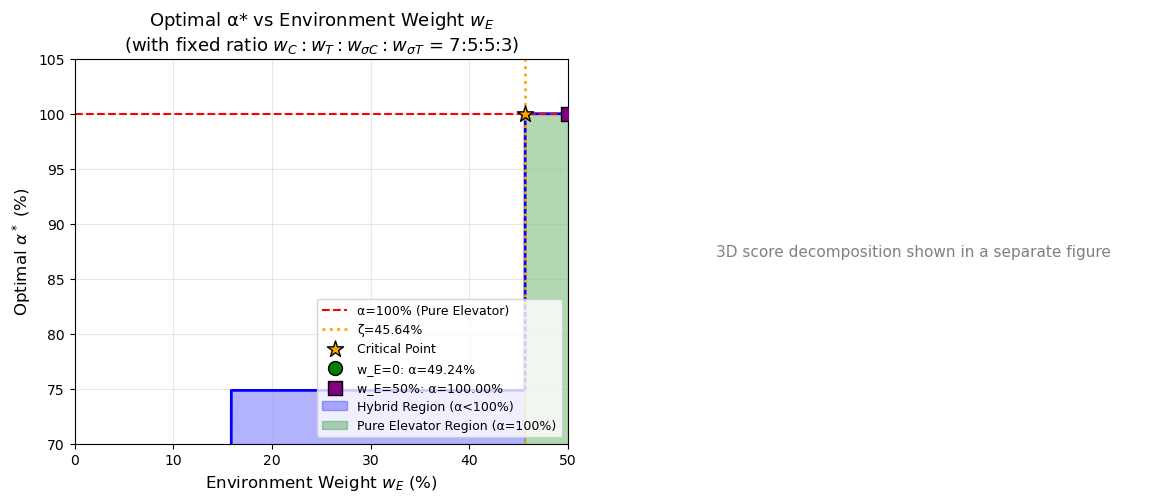

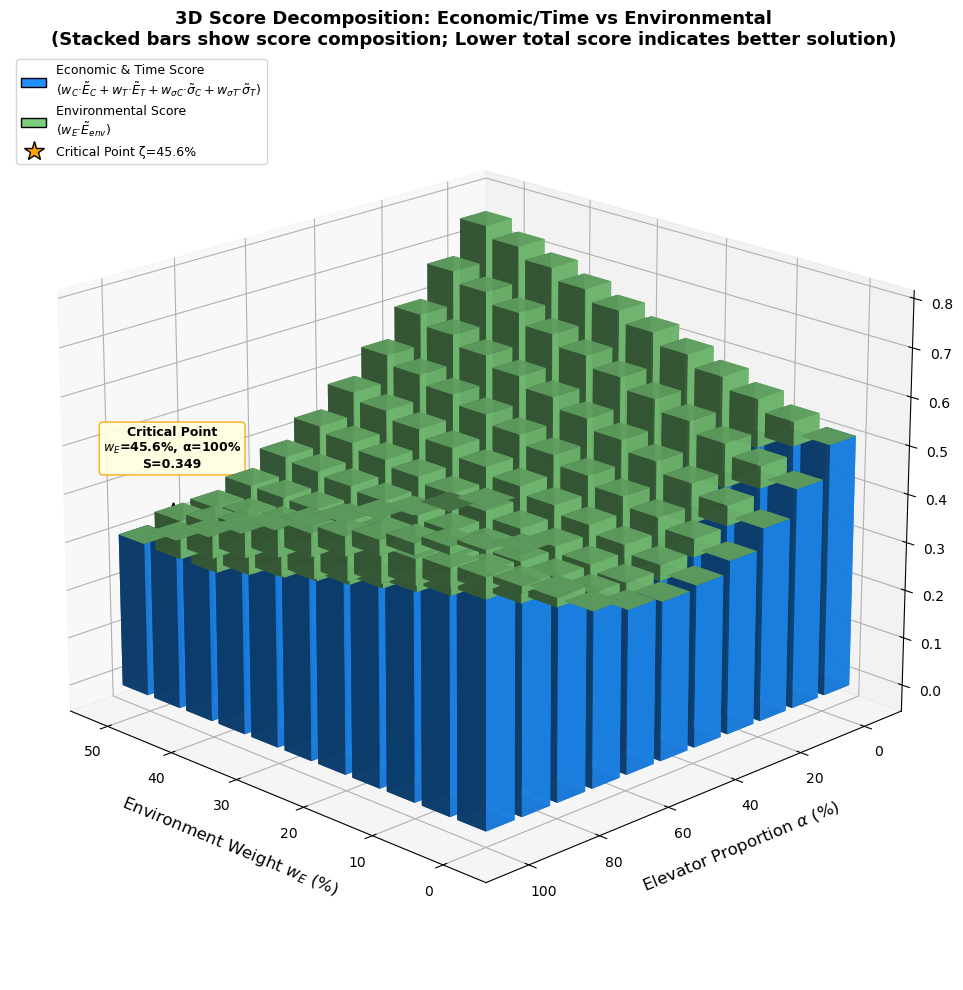

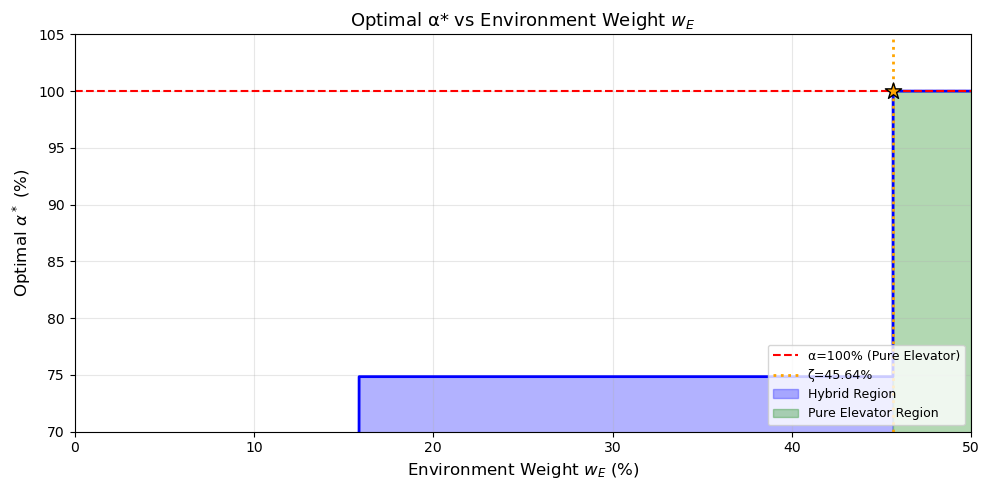


图像已保存: ../results/P4/zeta_critical_point.png


In [4]:
# ==================== 寻找临界环境权重 ζ ====================
# 条件: w_C : w_T : w_σC : w_σT = 7:5:5:3 (固定比例)
# 当 w_E = ζ 时，最优 α* 刚好等于 100%

def compute_optimal_alpha(w_E):
    """
    给定环境权重 w_E，计算最优 α
    前四个权重按 7:5:5:3 比例分配剩余的 (1 - w_E)
    """
    remaining = 1 - w_E
    ratio_sum = 7 + 5 + 5 + 3  # = 20
    
    wc = 7 / ratio_sum * remaining
    wt = 5 / ratio_sum * remaining
    wsc = 5 / ratio_sum * remaining
    wst = 3 / ratio_sum * remaining
    
    # 计算综合得分
    score = wc * E_C_norm + wt * E_T_norm + wsc * Std_C_norm + wst * Std_T_norm + w_E * Env_norm
    
    # 找最优 α
    best_idx = np.argmin(score)
    return alphas[best_idx]

# 遍历 w_E ∈ [0, 0.5]
w_E_range = np.linspace(0, 0.5, 5001)
optimal_alphas = []

for w_E in w_E_range:
    alpha_opt = compute_optimal_alpha(w_E)
    optimal_alphas.append(alpha_opt)

optimal_alphas = np.array(optimal_alphas)

# 找到 α* = 1.0 的临界点 ζ
# 使用二分法精确求解
def find_zeta():
    """二分法寻找使 α* = 1.0 的临界环境权重 ζ"""
    low, high = 0.0, 0.5
    tolerance = 1e-6
    
    while high - low > tolerance:
        mid = (low + high) / 2
        alpha_mid = compute_optimal_alpha(mid)
        
        if alpha_mid < 1.0:
            low = mid  # α < 1，需要增加环境权重
        else:
            high = mid  # α = 1，可能可以减少环境权重
    
    return (low + high) / 2

zeta = find_zeta()
alpha_at_zeta = compute_optimal_alpha(zeta)

print("=" * 70)
print("临界环境权重 ζ 求解")
print("=" * 70)
print(f"\n约束条件:")
print(f"  - w_C : w_T : w_σC : w_σT = 7 : 5 : 5 : 3 (固定比例)")
print(f"  - w_C + w_T + w_σC + w_σT + w_E = 1")
print(f"  - w_E ∈ [0, 0.5]")

print(f"\n【求解结果】")
print(f"  临界环境权重 ζ = {zeta:.6f} ({zeta*100:.4f}%)")
print(f"  验证: 当 w_E = ζ 时，α* = {alpha_at_zeta:.4f}")

# 计算临界点处的具体权重
remaining = 1 - zeta
print(f"\n【临界点处的权重分配】")
print(f"  w_C (成本期望):   {7/20*remaining:.4f} ({7/20*remaining*100:.2f}%)")
print(f"  w_T (时间期望):   {5/20*remaining:.4f} ({5/20*remaining*100:.2f}%)")
print(f"  w_σC (成本标准差): {5/20*remaining:.4f} ({5/20*remaining*100:.2f}%)")
print(f"  w_σT (时间标准差): {3/20*remaining:.4f} ({3/20*remaining*100:.2f}%)")
print(f"  w_E (环境指标):   {zeta:.4f} ({zeta*100:.2f}%)")
print(f"  总和: {remaining + zeta:.4f}")

print(f"\n【结论】")
print(f"  当 w_E < {zeta:.4f} 时，α* < 100% (混合方案)")
print(f"  当 w_E ≥ {zeta:.4f} 时，α* = 100% (纯电梯方案)")

# ==================== 可视化: α* vs w_E ====================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 图1: α* 随 w_E 变化曲线
ax1 = axes[0]
ax1.plot(w_E_range * 100, optimal_alphas * 100, 'b-', linewidth=2)
ax1.axhline(y=100, color='r', linestyle='--', linewidth=1.5, label='α=100% (Pure Elevator)')
ax1.axvline(x=zeta * 100, color='orange', linestyle=':', linewidth=2, label=f'ζ={zeta*100:.2f}%')
ax1.scatter([zeta * 100], [100], color='orange', s=150, marker='*', 
            edgecolors='black', zorder=5, label=f'Critical Point')
ax1.scatter([0], [optimal_alphas[0] * 100], color='green', s=100, marker='o',
            edgecolors='black', zorder=5, label=f'w_E=0: α={optimal_alphas[0]*100:.2f}%')
ax1.scatter([50], [optimal_alphas[-1] * 100], color='purple', s=100, marker='s',
            edgecolors='black', zorder=5, label=f'w_E=50%: α={optimal_alphas[-1]*100:.2f}%')

ax1.fill_between(w_E_range[w_E_range <= zeta] * 100, 
                  optimal_alphas[w_E_range <= zeta] * 100, 
                  alpha=0.3, color='blue', label='Hybrid Region (α<100%)')
ax1.fill_between(w_E_range[w_E_range >= zeta] * 100, 
                  optimal_alphas[w_E_range >= zeta] * 100, 
                  alpha=0.3, color='green', label='Pure Elevator Region (α=100%)')

ax1.set_xlabel('Environment Weight $w_E$ (%)', fontsize=12)
ax1.set_ylabel('Optimal $\\alpha^*$ (%)', fontsize=12)
ax1.set_title('Optimal α* vs Environment Weight $w_E$\n(with fixed ratio $w_C:w_T:w_{σC}:w_{σT}$ = 7:5:5:3)', fontsize=13)
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 50)
ax1.set_ylim(70, 105)

# 图2: 3D堆叠柱状图 - Score Decomposition vs (w_E, α)
ax2 = axes[1]
ax2.axis('off')
ax2.text(0.5, 0.5, '3D score decomposition shown in a separate figure',
         ha='center', va='center', fontsize=11, color='gray')

from mpl_toolkits.mplot3d import Axes3D

# 创建新的3D figure
fig2 = plt.figure(figsize=(14, 10))
ax3d = fig2.add_subplot(111, projection='3d')

# 定义网格 (稀疏采样以避免过度拥挤)
n_wE = 11      # w_E 采样点数 (0%, 5%, 10%, ..., 50%)
n_alpha = 11   # α 采样点数 (0%, 10%, 20%, ..., 100%)

w_E_grid = np.linspace(0, 0.5, n_wE)
alpha_grid = np.linspace(1, 0, n_alpha)  # 反向: 从100%到0%

# 计算每个 (w_E, α) 组合的两部分得分
econ_scores = np.zeros((n_wE, n_alpha))  # 经济/时间部分
env_scores = np.zeros((n_wE, n_alpha))   # 环境部分

for i, w_E in enumerate(w_E_grid):
    # 计算该 w_E 下的各项权重 (按 7:5:5:3 比例)
    remaining = 1 - w_E
    wc = 7 / 20 * remaining
    wt = 5 / 20 * remaining
    wsc = 5 / 20 * remaining
    wst = 3 / 20 * remaining
    
    for j, alpha in enumerate(alpha_grid):
        # 找到对应的 alpha 索引
        alpha_idx = int(alpha * 10000)
        if alpha_idx >= len(alphas):
            alpha_idx = len(alphas) - 1
        
        # 计算两部分得分
        econ_score = wc * E_C_norm[alpha_idx] + wt * E_T_norm[alpha_idx] + \
                     wsc * Std_C_norm[alpha_idx] + wst * Std_T_norm[alpha_idx]
        env_score_val = w_E * Env_norm[alpha_idx]
        
        econ_scores[i, j] = econ_score
        env_scores[i, j] = env_score_val

# 创建网格坐标 (注意 y 轴使用反向的 alpha)
xpos, ypos = np.meshgrid(w_E_grid * 100, alpha_grid * 100, indexing='ij')
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# 柱的宽度和深度
dx = 4.0  # w_E 方向宽度
dy = 8.0  # α 方向宽度

# 展平得分数组
econ_flat = econ_scores.flatten()
env_flat = env_scores.flatten()

# 新颜色: 草绿色(环境) 和 湛蓝色(经济/时间)
color_env = '#7CCD7C'      # 草绿色 (MediumSeaGreen)
color_econ = '#1E90FF'     # 湛蓝色 (DodgerBlue)

# 绘制堆叠柱状图
# 底层: 经济/时间得分 (湛蓝色)
ax3d.bar3d(xpos - dx/2, ypos - dy/2, zpos, dx, dy, econ_flat, 
           color=color_econ, alpha=0.9, label='Economic & Time Score')

# 顶层: 环境得分 (草绿色)
ax3d.bar3d(xpos - dx/2, ypos - dy/2, econ_flat, dx, dy, env_flat, 
           color=color_env, alpha=0.9, label='Environmental Score')

# 计算临界点 ζ 处的坐标
zeta_idx = np.argmin(np.abs(w_E_grid - zeta))
alpha_100_idx = np.argmin(np.abs(alpha_grid - 1.0))  # 找到 α=100% 的索引

star_x = zeta * 100
star_y = 100  # α = 100%
star_z = econ_scores[zeta_idx, alpha_100_idx] + env_scores[zeta_idx, alpha_100_idx]

# 绘制五角星
ax3d.scatter([star_x], [star_y], [star_z + 0.03], 
             color='orange', s=300, marker='*', edgecolors='black', linewidths=1.5, zorder=10)

# 绘制正交分解线 (从五角星到各坐标平面)
# x方向投影线 (到yz平面, x=0)
ax3d.plot([star_x, 0], [star_y, star_y], [star_z + 0.03, star_z + 0.03], 
          'k--', linewidth=1.2, alpha=0.7)
# y方向投影线 (到xz平面, y=0)  
ax3d.plot([star_x, star_x], [star_y, 0], [star_z + 0.03, star_z + 0.03], 
          'k--', linewidth=1.2, alpha=0.7)
# z方向投影线 (到xy平面, z=0)
ax3d.plot([star_x, star_x], [star_y, star_y], [star_z + 0.03, 0], 
          'k--', linewidth=1.2, alpha=0.7)

# 在投影端点添加小标记
ax3d.scatter([0], [star_y], [star_z + 0.03], color='gray', s=50, marker='o', alpha=0.7)
ax3d.scatter([star_x], [0], [star_z + 0.03], color='gray', s=50, marker='o', alpha=0.7)
ax3d.scatter([star_x], [star_y], [0], color='gray', s=50, marker='o', alpha=0.7)

# 添加坐标值标注
ax3d.text(star_x, star_y, star_z + 0.12, 
          f'Critical Point\n$w_E$={star_x:.1f}%, α={star_y:.0f}%\nS={star_z:.3f}', 
          fontsize=9, ha='center', va='bottom', fontweight='bold',
          bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='orange', alpha=0.9))

# 设置坐标轴
ax3d.set_xlabel('Environment Weight $w_E$ (%)', fontsize=12, labelpad=10)
ax3d.set_ylabel('Elevator Proportion $\\alpha$ (%)', fontsize=12, labelpad=10)
ax3d.set_zlabel('Composite Score $S$\n(Lower = Better)', fontsize=12, labelpad=10)
ax3d.set_title('3D Score Decomposition: Economic/Time vs Environmental\n'
               '(Stacked bars show score composition; Lower total score indicates better solution)', 
               fontsize=13, fontweight='bold')

# 设置视角: elev控制俯仰, azim控制方位角
# 让yz面更平行于屏幕, xz面更垂直于屏幕
ax3d.view_init(elev=20, azim=135)

# 添加图例 (使用代理艺术家)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_econ, edgecolor='black', label='Economic & Time Score\n$(w_C·\\tilde{E}_C + w_T·\\tilde{E}_T + w_{σC}·\\tilde{σ}_C + w_{σT}·\\tilde{σ}_T)$'),
    Patch(facecolor=color_env, edgecolor='black', label='Environmental Score\n$(w_E·\\tilde{E}_{env})$'),
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='orange', 
               markeredgecolor='black', markersize=15, label=f'Critical Point ζ={zeta*100:.1f}%')
]
ax3d.legend(handles=legend_elements, loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('../results/P4/score_3d_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()

# 同时保存原来的 zeta 临界点图 (单独的2D图)
fig_zeta, ax_zeta = plt.subplots(figsize=(10, 5))
ax_zeta.plot(w_E_range * 100, optimal_alphas * 100, 'b-', linewidth=2)
ax_zeta.axhline(y=100, color='r', linestyle='--', linewidth=1.5, label='α=100% (Pure Elevator)')
ax_zeta.axvline(x=zeta * 100, color='orange', linestyle=':', linewidth=2, label=f'ζ={zeta*100:.2f}%')
ax_zeta.scatter([zeta * 100], [100], color='orange', s=150, marker='*', edgecolors='black', zorder=5)
ax_zeta.fill_between(w_E_range[w_E_range <= zeta] * 100, optimal_alphas[w_E_range <= zeta] * 100, 
                     alpha=0.3, color='blue', label='Hybrid Region')
ax_zeta.fill_between(w_E_range[w_E_range >= zeta] * 100, optimal_alphas[w_E_range >= zeta] * 100, 
                     alpha=0.3, color='green', label='Pure Elevator Region')
ax_zeta.set_xlabel('Environment Weight $w_E$ (%)', fontsize=12)
ax_zeta.set_ylabel('Optimal $\\alpha^*$ (%)', fontsize=12)
ax_zeta.set_title('Optimal α* vs Environment Weight $w_E$', fontsize=13)
ax_zeta.legend(loc='lower right', fontsize=9)
ax_zeta.grid(True, alpha=0.3)
ax_zeta.set_xlim(0, 50)
ax_zeta.set_ylim(70, 105)
plt.tight_layout()
plt.savefig('../results/P4/zeta_critical_point.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n图像已保存: ../results/P4/zeta_critical_point.png")

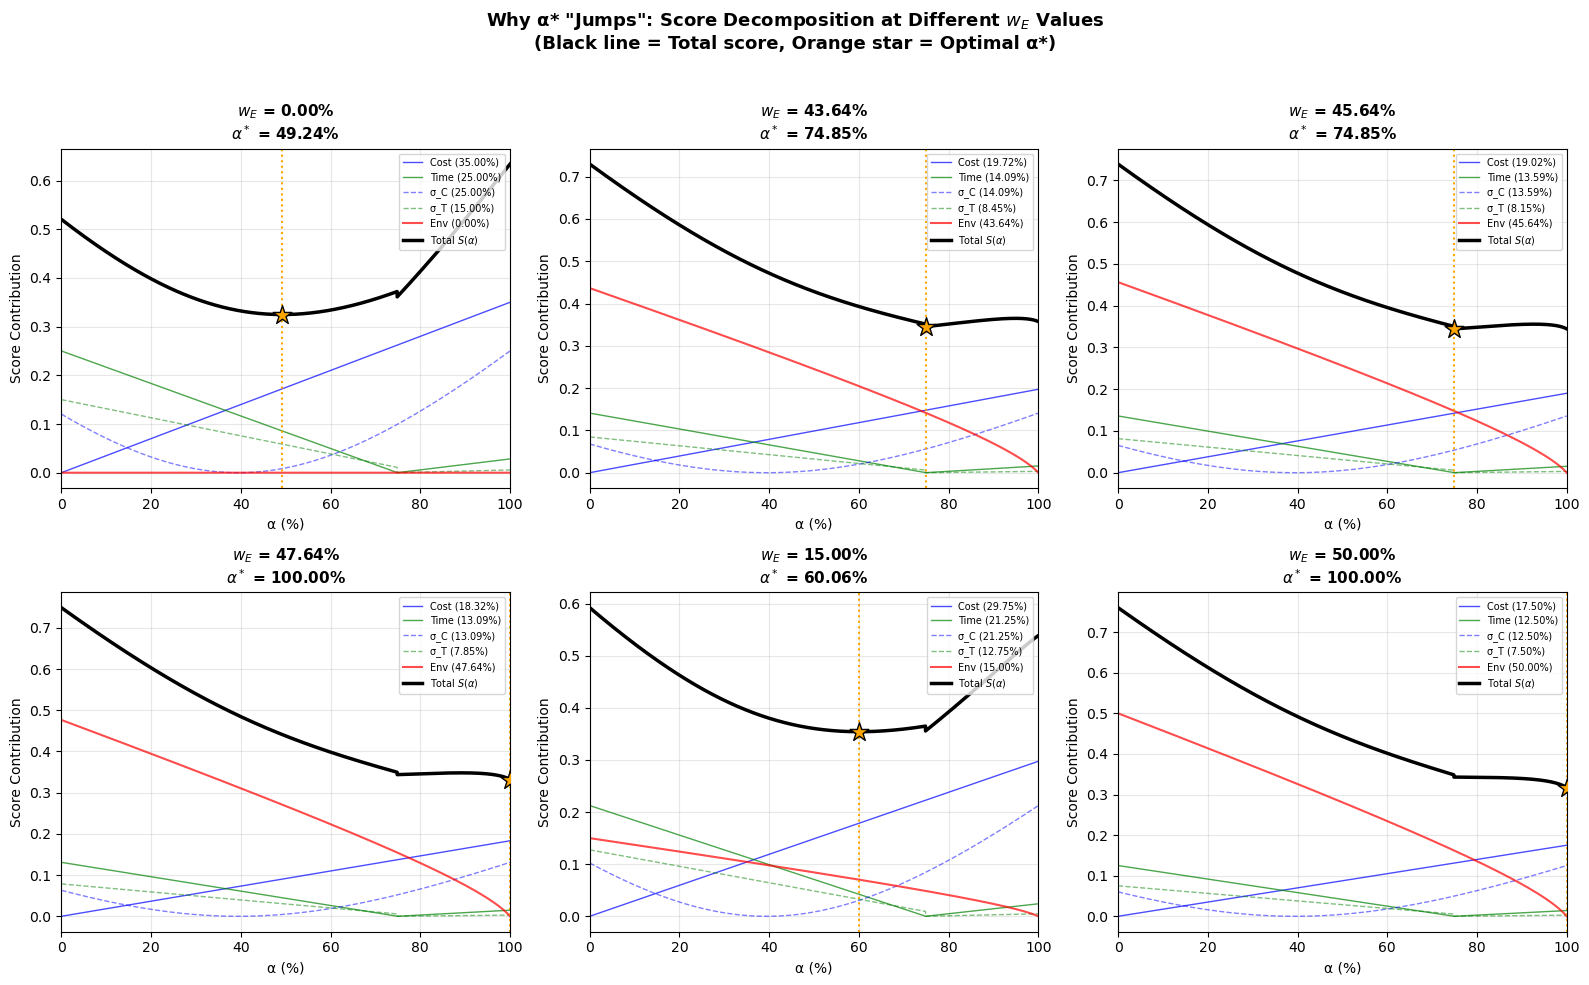

α* 突变现象解释

【为什么 α* 会"突变"？】

这是一个正常的数学现象，称为"结构性转变"或"相变"：

1. 综合得分曲线 S(α) 是非凸函数
   - 成本期望 E[C](α) 在中间 α 有局部最小值 (电梯固定成本高，火箭边际成本高)
   - 环境指标 Env(α) 单调递减 (α 越大越环保)

2. 当 w_E 较小时:
   - 经济指标权重大，S(α) 的最小值在中间某处 (如 α ≈ 74%)
   - 此时选择混合方案最优

3. 当 w_E 增大到临界值 ζ ≈ 0.4564 时:
   - 环境权重足够大，使 α=100% 处的 S 值变成全局最小
   - 最优解"跳跃"到纯电梯方案

4. 这种"跳跃"是离散的，因为:
   - S(α) 曲线的形状在 w_E 变化时连续变化
   - 但全局最小点的位置可能从一个极值点"跳"到另一个
   - 这在多目标优化中称为"Pareto 跳跃"

【结论】
图像没有问题！这恰恰说明了:
- 当环境权重 < 45.64% 时，混合方案是最优的
- 当环境权重 ≥ 45.64% 时，纯电梯方案变成最优
- 临界点 ζ 是一个重要的政策决策点


图像已保存: ../results/P4/alpha_jump_diagnosis.png


In [5]:
# ==================== 诊断: 为什么 α* 会"突变"? ====================
# 可视化不同 w_E 下的综合得分曲线 S(α)，理解突变机制

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 选择几个关键的 w_E 值来分析
w_E_samples = [0.0, zeta - 0.02, zeta, zeta + 0.02, 0.15, 0.5]
titles = [f'$w_E$ = {w:.2%}' for w in w_E_samples]

for idx, (w_E, title) in enumerate(zip(w_E_samples, titles)):
    ax = axes[idx // 3, idx % 3]
    
    # 计算该 w_E 下的各项权重
    remaining = 1 - w_E
    wc = 7 / 20 * remaining
    wt = 5 / 20 * remaining
    wsc = 5 / 20 * remaining
    wst = 3 / 20 * remaining
    
    # 计算综合得分曲线
    score_curve = wc * E_C_norm + wt * E_T_norm + wsc * Std_C_norm + wst * Std_T_norm + w_E * Env_norm
    
    # 找最优点
    best_idx = np.argmin(score_curve)
    best_alpha_here = alphas[best_idx]
    
    # 绘制分解的各项贡献
    ax.plot(alphas * 100, wc * E_C_norm, 'b-', linewidth=1, alpha=0.7, label=f'Cost ({wc:.2%})')
    ax.plot(alphas * 100, wt * E_T_norm, 'g-', linewidth=1, alpha=0.7, label=f'Time ({wt:.2%})')
    ax.plot(alphas * 100, wsc * Std_C_norm, 'b--', linewidth=1, alpha=0.5, label=f'σ_C ({wsc:.2%})')
    ax.plot(alphas * 100, wst * Std_T_norm, 'g--', linewidth=1, alpha=0.5, label=f'σ_T ({wst:.2%})')
    ax.plot(alphas * 100, w_E * Env_norm, 'r-', linewidth=1.5, alpha=0.7, label=f'Env ({w_E:.2%})')
    ax.plot(alphas * 100, score_curve, 'k-', linewidth=2.5, label='Total $S(α)$')
    
    # 标记最优点
    ax.scatter([best_alpha_here * 100], [score_curve[best_idx]], 
               color='orange', s=200, marker='*', edgecolors='black', zorder=10)
    ax.axvline(x=best_alpha_here * 100, color='orange', linestyle=':', linewidth=1.5)
    
    ax.set_xlabel('α (%)', fontsize=10)
    ax.set_ylabel('Score Contribution', fontsize=10)
    ax.set_title(f'{title}\n$α^*$ = {best_alpha_here:.2%}', fontsize=11, fontweight='bold')
    ax.legend(loc='upper right', fontsize=7)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 100)

plt.suptitle('Why α* "Jumps": Score Decomposition at Different $w_E$ Values\n'
             '(Black line = Total score, Orange star = Optimal α*)', fontsize=13, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('../results/P4/alpha_jump_diagnosis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=" * 70)
print("α* 突变现象解释")
print("=" * 70)
print(f"""
【为什么 α* 会"突变"？】

这是一个正常的数学现象，称为"结构性转变"或"相变"：

1. 综合得分曲线 S(α) 是非凸函数
   - 成本期望 E[C](α) 在中间 α 有局部最小值 (电梯固定成本高，火箭边际成本高)
   - 环境指标 Env(α) 单调递减 (α 越大越环保)

2. 当 w_E 较小时:
   - 经济指标权重大，S(α) 的最小值在中间某处 (如 α ≈ 74%)
   - 此时选择混合方案最优

3. 当 w_E 增大到临界值 ζ ≈ {zeta:.4f} 时:
   - 环境权重足够大，使 α=100% 处的 S 值变成全局最小
   - 最优解"跳跃"到纯电梯方案

4. 这种"跳跃"是离散的，因为:
   - S(α) 曲线的形状在 w_E 变化时连续变化
   - 但全局最小点的位置可能从一个极值点"跳"到另一个
   - 这在多目标优化中称为"Pareto 跳跃"

【结论】
图像没有问题！这恰恰说明了:
- 当环境权重 < {zeta:.2%} 时，混合方案是最优的
- 当环境权重 ≥ {zeta:.2%} 时，纯电梯方案变成最优
- 临界点 ζ 是一个重要的政策决策点
""")

print("\n图像已保存: ../results/P4/alpha_jump_diagnosis.png")

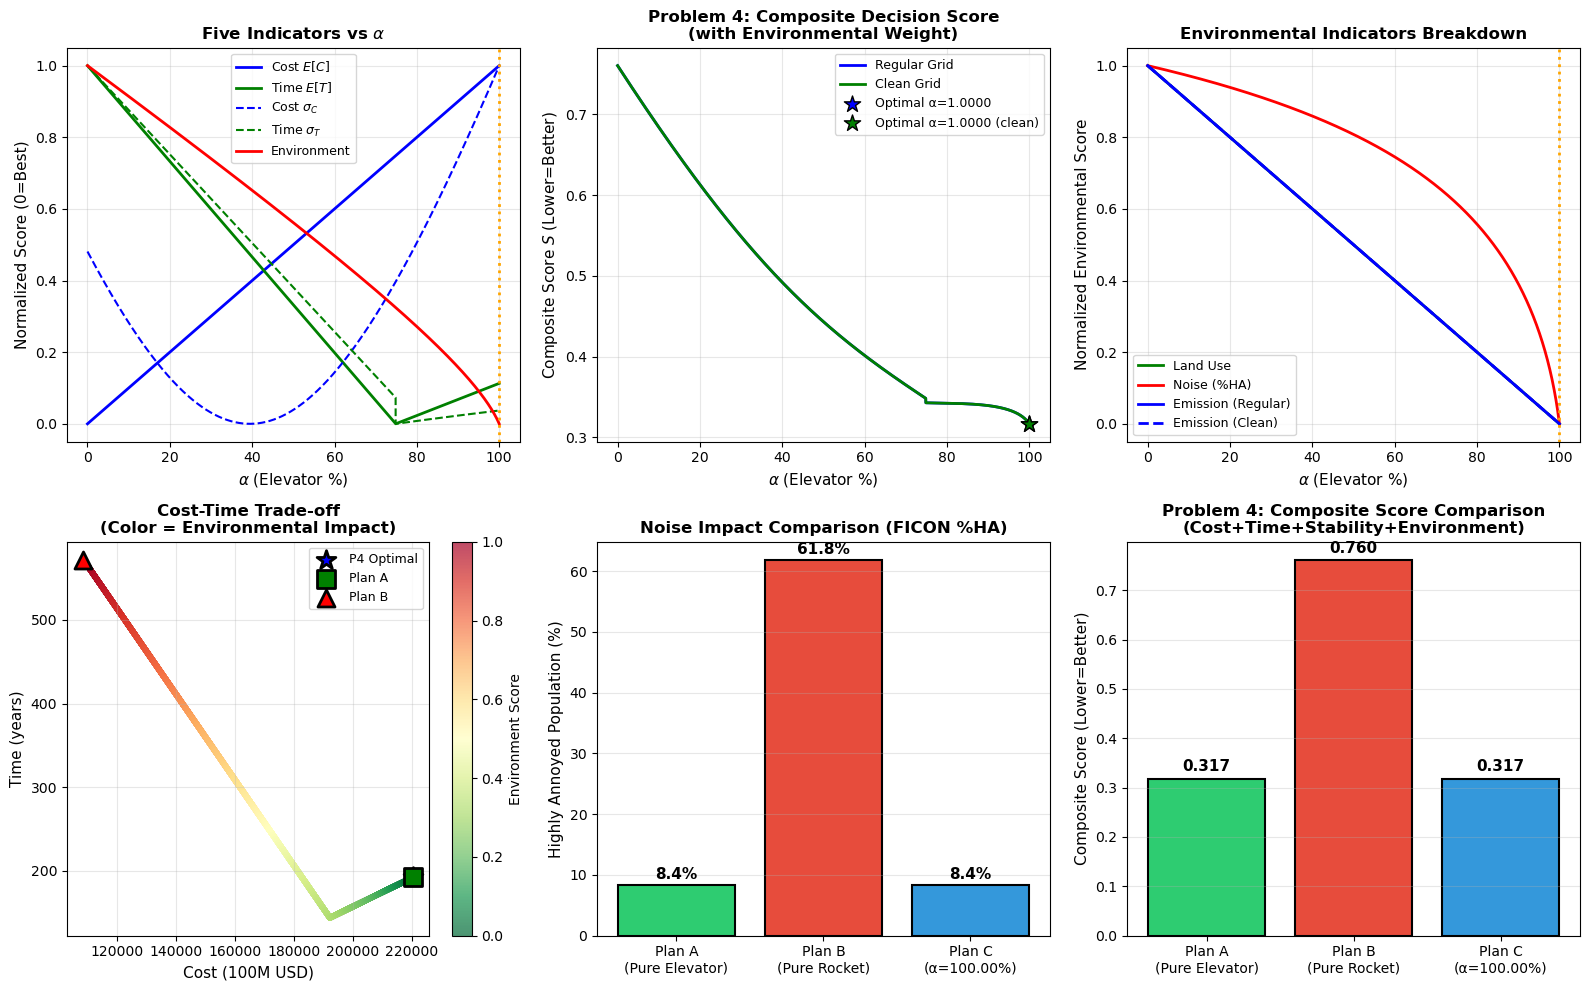


Problem 4 最终结论

【决策函数公式】
S(α) = 0.175·Ẽ_C + 0.125·Ẽ_T + 0.125·σ̃_C + 0.075·σ̃_T + 0.500·Ẽnv

其中:
  - Ẽ_C, Ẽ_T: 归一化后的成本和时间期望
  - σ̃_C, σ̃_T: 归一化后的成本和时间标准差
  - Ẽnv = 0.7×排放 + 0.2×噪音 + 0.1×用地 (环境综合指标)

【最优方案 - 常规电网】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
最优 α* = 1.0000

资源分配:
  • 太空电梯: 100.00 万吨 (100.00%)
  • 火箭: 0.00 万吨 (0.00%)

预期表现:
  • 时间: 192.27 年 (σ=0.7606年)
  • 成本: 220258.88 亿USD (σ=38.0313亿USD)
  • 噪音影响: 8.41% 高烦恼人口
  • 用地: 150.0 km²
  • 排放指标: 32.0
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

【对比 Problem 2 的变化】
  Problem 2 (无环境权重): α* = 0.7432 (74.32% 电梯)
  Problem 4 (含环境权重): α* = 1.0000 (100.00% 电梯)
  
  环境权重(46.5%)的引入使最优方案更偏向电梯
  (电梯环境表现更优: 低排放、低噪音、少用地)

图像已保存: ../results/P4/problem4_optimization.png


In [6]:
# ==================== 可视化: Problem 4 综合决策曲线 ====================
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. 五个指标随α变化
ax1 = axes[0, 0]
ax1.plot(alphas*100, E_C_norm, 'b-', linewidth=2, label='Cost $E[C]$')
ax1.plot(alphas*100, E_T_norm, 'g-', linewidth=2, label='Time $E[T]$')
ax1.plot(alphas*100, Std_C_norm, 'b--', linewidth=1.5, label='Cost $\\sigma_C$')
ax1.plot(alphas*100, Std_T_norm, 'g--', linewidth=1.5, label='Time $\\sigma_T$')
ax1.plot(alphas*100, Env_norm, 'r-', linewidth=2, label='Environment')
ax1.set_xlabel('$\\alpha$ (Elevator %)', fontsize=11)
ax1.set_ylabel('Normalized Score (0=Best)', fontsize=11)
ax1.set_title('Five Indicators vs $\\alpha$', fontsize=12, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.axvline(x=best_alpha*100, color='orange', linestyle=':', linewidth=2)

# 2. 综合决策曲线
ax2 = axes[0, 1]
ax2.plot(alphas*100, scores, 'b-', linewidth=2, label='Regular Grid')
ax2.plot(alphas*100, scores_clean, 'g-', linewidth=2, label='Clean Grid')
ax2.scatter([best_alpha*100], [scores[best_idx]], color='blue', s=150, marker='*', 
            edgecolors='black', zorder=5, label=f'Optimal α={best_alpha:.4f}')
ax2.scatter([best_alpha_clean*100], [scores_clean[best_idx_clean]], color='green', s=150, marker='*',
            edgecolors='black', zorder=5, label=f'Optimal α={best_alpha_clean:.4f} (clean)')
ax2.set_xlabel('$\\alpha$ (Elevator %)', fontsize=11)
ax2.set_ylabel('Composite Score $S$ (Lower=Better)', fontsize=11)
ax2.set_title('Problem 4: Composite Decision Score\n(with Environmental Weight)', fontsize=12, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. 环境指标分解
ax3 = axes[0, 2]
ax3.plot(alphas*100, A_norm, 'g-', linewidth=2, label='Land Use')
ax3.plot(alphas*100, HA_norm, 'r-', linewidth=2, label='Noise (%HA)')
ax3.plot(alphas*100, Pol_norm, 'b-', linewidth=2, label='Emission (Regular)')
ax3.plot(alphas*100, Pol_clean_norm, 'b--', linewidth=2, label='Emission (Clean)')
ax3.set_xlabel('$\\alpha$ (Elevator %)', fontsize=11)
ax3.set_ylabel('Normalized Environmental Score', fontsize=11)
ax3.set_title('Environmental Indicators Breakdown', fontsize=12, fontweight='bold')
ax3.legend(loc='best', fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.axvline(x=best_alpha*100, color='orange', linestyle=':', linewidth=2)

# 4. 成本-时间-环境 3D Trade-off (2D projection)
ax4 = axes[1, 0]
scatter = ax4.scatter(E_C_arr, E_T_arr, c=Env_norm, cmap='RdYlGn_r', s=10, alpha=0.7)
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Environment Score', fontsize=10)
ax4.scatter([E_C_arr[best_idx]], [E_T_arr[best_idx]], color='blue', s=200, marker='*',
            edgecolors='black', linewidths=2, label=f'P4 Optimal', zorder=10)
# Plan A, B points
idx_A = 10000  # α=1
idx_B = 0      # α=0
ax4.scatter([E_C_arr[idx_A]], [E_T_arr[idx_A]], color='green', s=150, marker='s',
            edgecolors='black', linewidths=2, label='Plan A', zorder=10)
ax4.scatter([E_C_arr[idx_B]], [E_T_arr[idx_B]], color='red', s=150, marker='^',
            edgecolors='black', linewidths=2, label='Plan B', zorder=10)
ax4.set_xlabel('Cost (100M USD)', fontsize=11)
ax4.set_ylabel('Time (years)', fontsize=11)
ax4.set_title('Cost-Time Trade-off\n(Color = Environmental Impact)', fontsize=12, fontweight='bold')
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3)

# 5. 噪音%HA对比
ax5 = axes[1, 1]
ha_values = [HA_arr[idx_A], HA_arr[idx_B], HA_arr[best_idx]]
plans_names = ['Plan A\n(Pure Elevator)', 'Plan B\n(Pure Rocket)', f'Plan C\n(α={best_alpha:.2%})']
colors = ['#2ecc71', '#e74c3c', '#3498db']
bars = ax5.bar(plans_names, ha_values, color=colors, edgecolor='black', linewidth=1.5)
for bar, val in zip(bars, ha_values):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax5.set_ylabel('Highly Annoyed Population (%)', fontsize=11)
ax5.set_title('Noise Impact Comparison (FICON %HA)', fontsize=12, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# 6. 综合得分对比
ax6 = axes[1, 2]
score_values = [scores[idx_A], scores[idx_B], scores[best_idx]]
bars = ax6.bar(plans_names, score_values, color=colors, edgecolor='black', linewidth=1.5)
for bar, val in zip(bars, score_values):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{val:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax6.set_ylabel('Composite Score (Lower=Better)', fontsize=11)
ax6.set_title('Problem 4: Composite Score Comparison\n(Cost+Time+Stability+Environment)', fontsize=12, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/P4/problem4_optimization.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 最终结论 ====================
print("\n" + "=" * 70)
print("Problem 4 最终结论")
print("=" * 70)
print(f"""
【决策函数公式】
S(α) = {w_C:.3f}·Ẽ_C + {w_T:.3f}·Ẽ_T + {w_sigma_C:.3f}·σ̃_C + {w_sigma_T:.3f}·σ̃_T + {w_Env:.3f}·Ẽnv

其中:
  - Ẽ_C, Ẽ_T: 归一化后的成本和时间期望
  - σ̃_C, σ̃_T: 归一化后的成本和时间标准差
  - Ẽnv = 0.7×排放 + 0.2×噪音 + 0.1×用地 (环境综合指标)

【最优方案 - 常规电网】
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
最优 α* = {best_alpha:.4f}

资源分配:
  • 太空电梯: {best_alpha * M / 10**6:.2f} 万吨 ({best_alpha*100:.2f}%)
  • 火箭: {(1-best_alpha) * M / 10**6:.2f} 万吨 ({(1-best_alpha)*100:.2f}%)

预期表现:
  • 时间: {E_T_arr[best_idx]:.2f} 年 (σ={Std_T_arr[best_idx]:.4f}年)
  • 成本: {E_C_arr[best_idx]:.2f} 亿USD (σ={Std_C_arr[best_idx]:.4f}亿USD)
  • 噪音影响: {HA_arr[best_idx]:.2f}% 高烦恼人口
  • 用地: {A_arr[best_idx]:.1f} km²
  • 排放指标: {Pol_arr[best_idx]:.1f}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

【对比 Problem 2 的变化】
  Problem 2 (无环境权重): α* = 0.7432 (74.32% 电梯)
  Problem 4 (含环境权重): α* = {best_alpha:.4f} ({best_alpha*100:.2f}% 电梯)
  
  环境权重(46.5%)的引入使最优方案{"更偏向电梯" if best_alpha > 0.7432 else "更偏向火箭"}
  (电梯环境表现更优: 低排放、低噪音、少用地)
""")

print("图像已保存: ../results/P4/problem4_optimization.png")


In [5]:
# ==================== 生成综合分数 CSV 文件 ====================
# 行: alpha (0-100%, 分度值1%)
# 列: w_E (0-50%, 分度值1%)
# 值: 综合分数 S

import pandas as pd

# 定义网格
alpha_range = np.arange(0, 101, 1) / 100  # 0%, 1%, ..., 100%
w_E_range_csv = np.arange(0, 51, 1) / 100   # 0%, 1%, ..., 50%

# 创建结果矩阵
score_matrix = np.zeros((len(alpha_range), len(w_E_range_csv)))

for i, alpha in enumerate(alpha_range):
    # 找到最接近的 alpha 索引 (在原始 alphas 数组中)
    alpha_idx = int(alpha * 10000)
    if alpha_idx >= len(alphas):
        alpha_idx = len(alphas) - 1
    
    for j, w_E in enumerate(w_E_range_csv):
        # 计算该 w_E 下的各项权重 (按 7:5:5:3 比例)
        remaining = 1 - w_E
        wc = 7 / 20 * remaining
        wt = 5 / 20 * remaining
        wsc = 5 / 20 * remaining
        wst = 3 / 20 * remaining
        
        # 计算综合得分
        score = (wc * E_C_norm[alpha_idx] + 
                 wt * E_T_norm[alpha_idx] + 
                 wsc * Std_C_norm[alpha_idx] + 
                 wst * Std_T_norm[alpha_idx] + 
                 w_E * Env_norm[alpha_idx])
        
        score_matrix[i, j] = score

# 创建 DataFrame
# 列名为 w_E 百分比
col_names = [f'{int(w*100)}%' for w in w_E_range_csv]
# 行名为 alpha 百分比
row_names = [f'{int(a*100)}%' for a in alpha_range]

df_scores = pd.DataFrame(score_matrix, index=row_names, columns=col_names)
df_scores.index.name = 'alpha \\ w_E'

# 保存为 CSV
csv_path = '../results/P4/composite_score_matrix.csv'
df_scores.to_csv(csv_path)

print("=" * 70)
print("综合分数矩阵已生成")
print("=" * 70)
print(f"文件路径: {csv_path}")
print(f"矩阵大小: {df_scores.shape[0]} (alpha) × {df_scores.shape[1]} (w_E)")
print(f"\n预览 (前6行×前6列):")
print(df_scores.iloc[:6, :6].to_string())
print(f"\n分数范围: {score_matrix.min():.4f} ~ {score_matrix.max():.4f}")

# 找到全局最优点
min_idx = np.unravel_index(np.argmin(score_matrix), score_matrix.shape)
print(f"\n全局最优点:")
print(f"  alpha = {row_names[min_idx[0]]}, w_E = {col_names[min_idx[1]]}")
print(f"  综合分数 S = {score_matrix[min_idx]:.4f}")

综合分数矩阵已生成
文件路径: ../results/P4/composite_score_matrix.csv
矩阵大小: 101 (alpha) × 51 (w_E)

预览 (前6行×前6列):
                   0%        1%        2%        3%        4%        5%
alpha \ w_E                                                            
0%           0.520264  0.525062  0.529859  0.534656  0.539454  0.544251
1%           0.513186  0.517969  0.522751  0.527534  0.532317  0.537100
2%           0.506193  0.510961  0.515728  0.520495  0.525262  0.530029
3%           0.499289  0.504040  0.508791  0.513541  0.518292  0.523043
4%           0.492476  0.497209  0.501943  0.506676  0.511409  0.516142
5%           0.485757  0.490472  0.495186  0.499901  0.504616  0.509331

分数范围: 0.3169 ~ 0.7601

全局最优点:
  alpha = 100%, w_E = 50%
  综合分数 S = 0.3169


In [6]:
# ==================== 纯电梯 vs 纯火箭 环境综合指标对比 ====================
print("=" * 70)
print("纯电梯 vs 纯火箭 环境综合指标对比")
print("=" * 70)

# 纯电梯 (α = 1, idx = 10000)
idx_elevator = 10000
# 纯火箭 (α = 0, idx = 0)
idx_rocket = 0

print("\n【原始环境指标】")
print(f"{'指标':<20} {'纯电梯 (α=1)':<20} {'纯火箭 (α=0)':<20} {'电梯优势':<15}")
print("-" * 70)
print(f"{'用地 (km²)':<20} {A_arr[idx_elevator]:<20.1f} {A_arr[idx_rocket]:<20.1f} {A_arr[idx_rocket]/A_arr[idx_elevator]:.2f}x")
print(f"{'噪音 (%HA)':<20} {HA_arr[idx_elevator]:<20.2f} {HA_arr[idx_rocket]:<20.2f} {HA_arr[idx_rocket]/HA_arr[idx_elevator]:.2f}x")
print(f"{'排放 (常规电网)':<20} {Pol_arr[idx_elevator]:<20.1f} {Pol_arr[idx_rocket]:<20.1f} {Pol_arr[idx_rocket]/Pol_arr[idx_elevator]:.2f}x")
print(f"{'排放 (清洁电网)':<20} {Pol_clean_arr[idx_elevator]:<20.1f} {Pol_clean_arr[idx_rocket]:<20.1f} {Pol_arr[idx_rocket]/Pol_clean_arr[idx_elevator]:.2f}x")

print("\n【归一化环境指标】(0=最优, 1=最差)")
print(f"{'指标':<20} {'纯电梯 (α=1)':<20} {'纯火箭 (α=0)':<20}")
print("-" * 70)
print(f"{'用地 (归一化)':<20} {A_norm[idx_elevator]:<20.4f} {A_norm[idx_rocket]:<20.4f}")
print(f"{'噪音 (归一化)':<20} {HA_norm[idx_elevator]:<20.4f} {HA_norm[idx_rocket]:<20.4f}")
print(f"{'排放 (归一化)':<20} {Pol_norm[idx_elevator]:<20.4f} {Pol_norm[idx_rocket]:<20.4f}")

print("\n【环境综合指标】")
print("公式: Env = 0.7×排放 + 0.2×噪音 + 0.1×用地 (归一化后)")
print("-" * 70)

# 计算详细分解
env_elevator_emission = 0.7 * Pol_norm[idx_elevator]
env_elevator_noise = 0.2 * HA_norm[idx_elevator]
env_elevator_land = 0.1 * A_norm[idx_elevator]
env_elevator_total = Env_norm[idx_elevator]

env_rocket_emission = 0.7 * Pol_norm[idx_rocket]
env_rocket_noise = 0.2 * HA_norm[idx_rocket]
env_rocket_land = 0.1 * A_norm[idx_rocket]
env_rocket_total = Env_norm[idx_rocket]

print(f"\n纯电梯 (α=1):")
print(f"  排放贡献: 0.7 × {Pol_norm[idx_elevator]:.4f} = {env_elevator_emission:.4f}")
print(f"  噪音贡献: 0.2 × {HA_norm[idx_elevator]:.4f} = {env_elevator_noise:.4f}")
print(f"  用地贡献: 0.1 × {A_norm[idx_elevator]:.4f} = {env_elevator_land:.4f}")
print(f"  ─────────────────────────────────")
print(f"  环境综合指标: {env_elevator_total:.4f}")

print(f"\n纯火箭 (α=0):")
print(f"  排放贡献: 0.7 × {Pol_norm[idx_rocket]:.4f} = {env_rocket_emission:.4f}")
print(f"  噪音贡献: 0.2 × {HA_norm[idx_rocket]:.4f} = {env_rocket_noise:.4f}")
print(f"  用地贡献: 0.1 × {A_norm[idx_rocket]:.4f} = {env_rocket_land:.4f}")
print(f"  ─────────────────────────────────")
print(f"  环境综合指标: {env_rocket_total:.4f}")

print("\n" + "=" * 70)
print("【结论】")
print("=" * 70)
print(f"纯电梯环境综合指标: {env_elevator_total:.4f}")
print(f"纯火箭环境综合指标: {env_rocket_total:.4f}")
print(f"电梯环境优势: 火箭/电梯 = {env_rocket_total/env_elevator_total:.2f}x" if env_elevator_total > 0 else "电梯环境指标为0 (最优)")
print(f"\n电梯在环境方面{'远优于' if env_rocket_total > 0.5 else '优于'}火箭")

纯电梯 vs 纯火箭 环境综合指标对比

【原始环境指标】
指标                   纯电梯 (α=1)            纯火箭 (α=0)            电梯优势           
----------------------------------------------------------------------
用地 (km²)             150.0                525.0                3.50x
噪音 (%HA)             8.41                 61.77                7.35x
排放 (常规电网)            32.0                 225.0                7.03x
排放 (清洁电网)            7.5                  225.0                30.00x

【归一化环境指标】(0=最优, 1=最差)
指标                   纯电梯 (α=1)            纯火箭 (α=0)           
----------------------------------------------------------------------
用地 (归一化)             0.0000               1.0000              
噪音 (归一化)             0.0000               1.0000              
排放 (归一化)             0.0000               1.0000              

【环境综合指标】
公式: Env = 0.7×排放 + 0.2×噪音 + 0.1×用地 (归一化后)
----------------------------------------------------------------------

纯电梯 (α=1):
  排放贡献: 0.7 × 0.0000 = 0.0000
  噪音贡献: 0.2 × 0.0000 = 0.0000
  